In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv(r'C:\Users\Mmesoma\Downloads\gold_monthly_csv.csv')


In [181]:
df.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [183]:
df.shape

(847, 2)

In [220]:
print(df.dtypes)

Price    float64
dtype: object


In [191]:
print(f"Date range of gold prices available from - {df.loc[0, 'Date']} to {df.loc[len(df) - 1, 'Date']}")


Date range of gold prices available from - 1950-01 to 2020-07


In [193]:
date = pd.date_range(start = "1/1/1950", end = "8/1/2020", freq = "M")
date


DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [195]:
df['month'] = date
df.drop("Date", axis=1, inplace=True)
df = df.set_index("month")
df.head()


,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


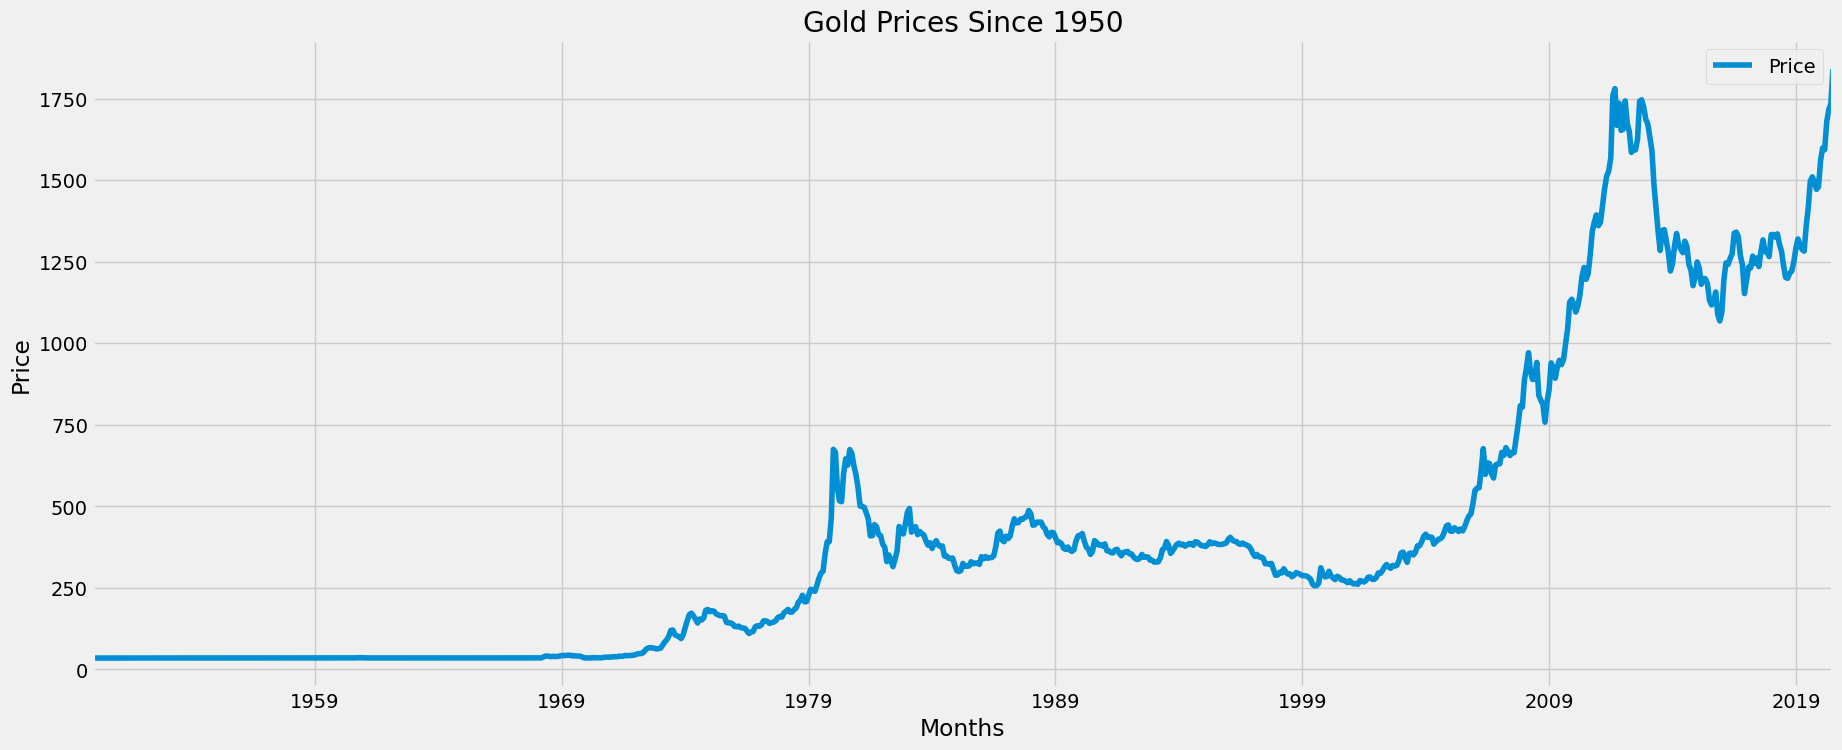

In [197]:
import matplotlib.pyplot as plt

df.plot(figsize=(20, 8))
plt.title("Gold Prices Since 1950")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [198]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


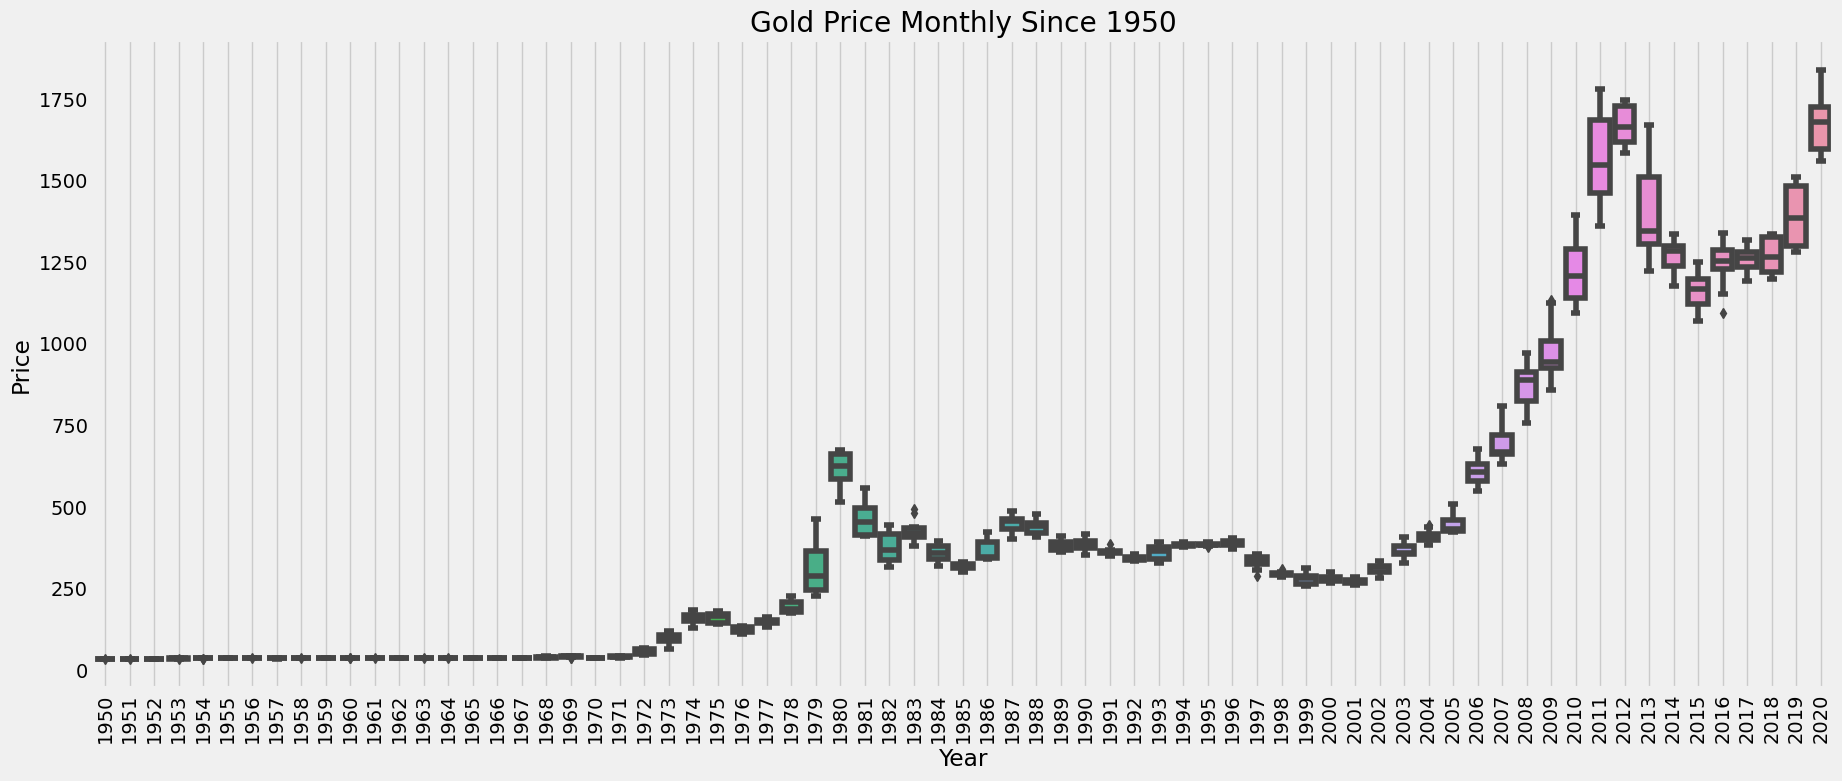

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusted the code
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x=df.index.year, y=df.values[:, 0], ax=ax)
plt.title("Gold Price Monthly Since 1950")
plt.xlabel("Year")  # Fixed typo from 'xlable' to 'xlabel'
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid()
plt.show()


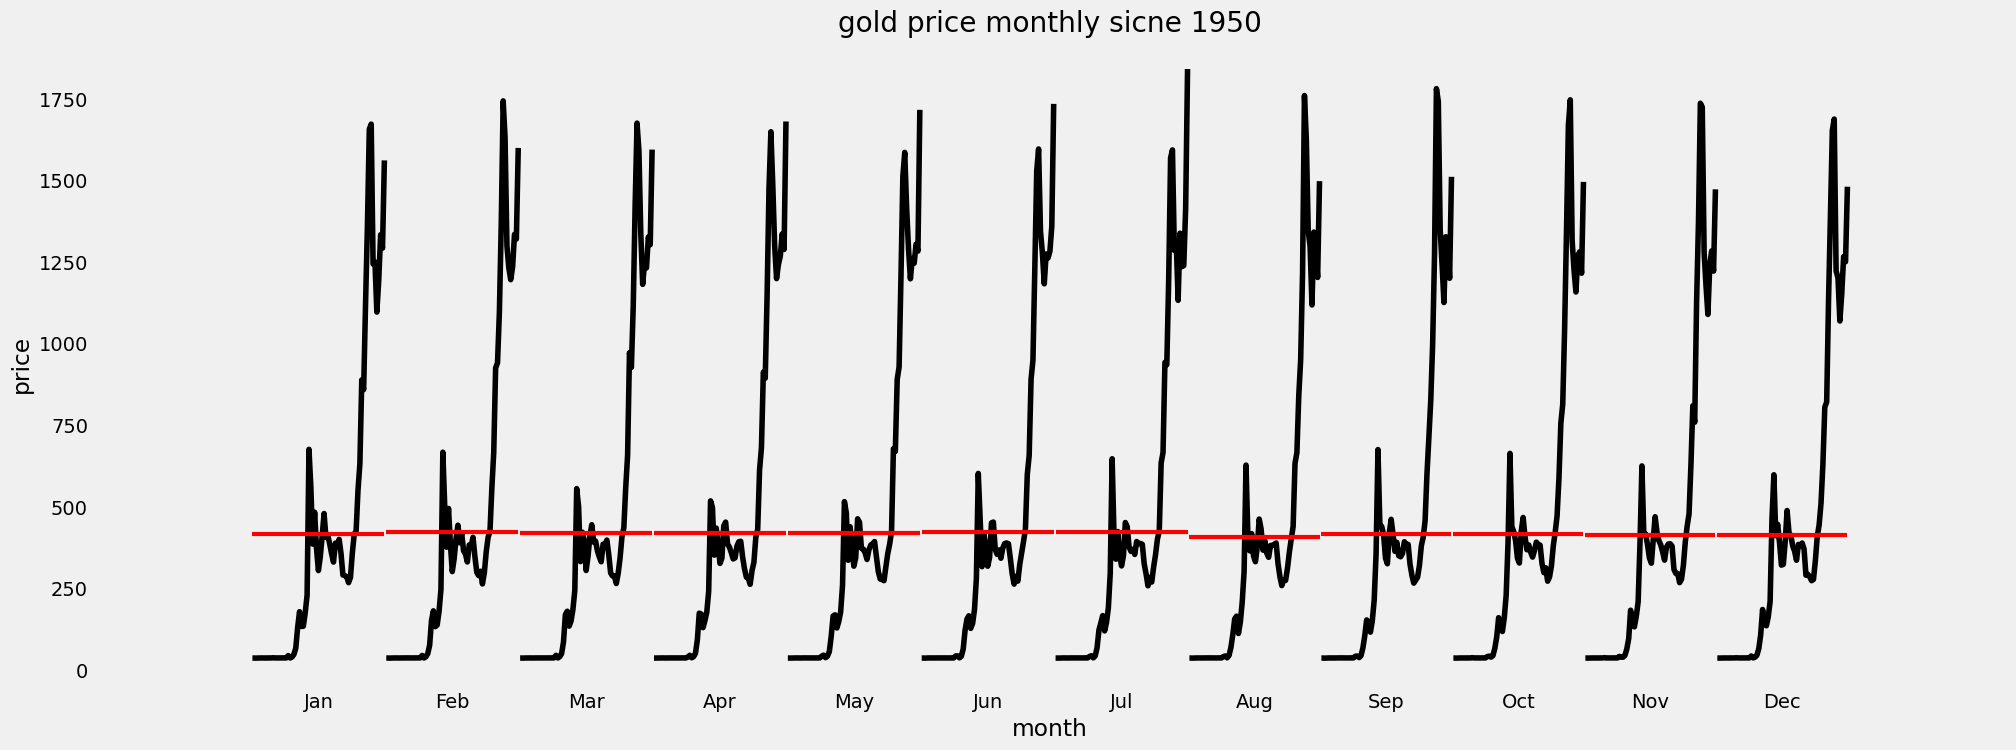

In [200]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel = 'gold price' , ax = ax)
plt.title ('gold price monthly sicne 1950')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

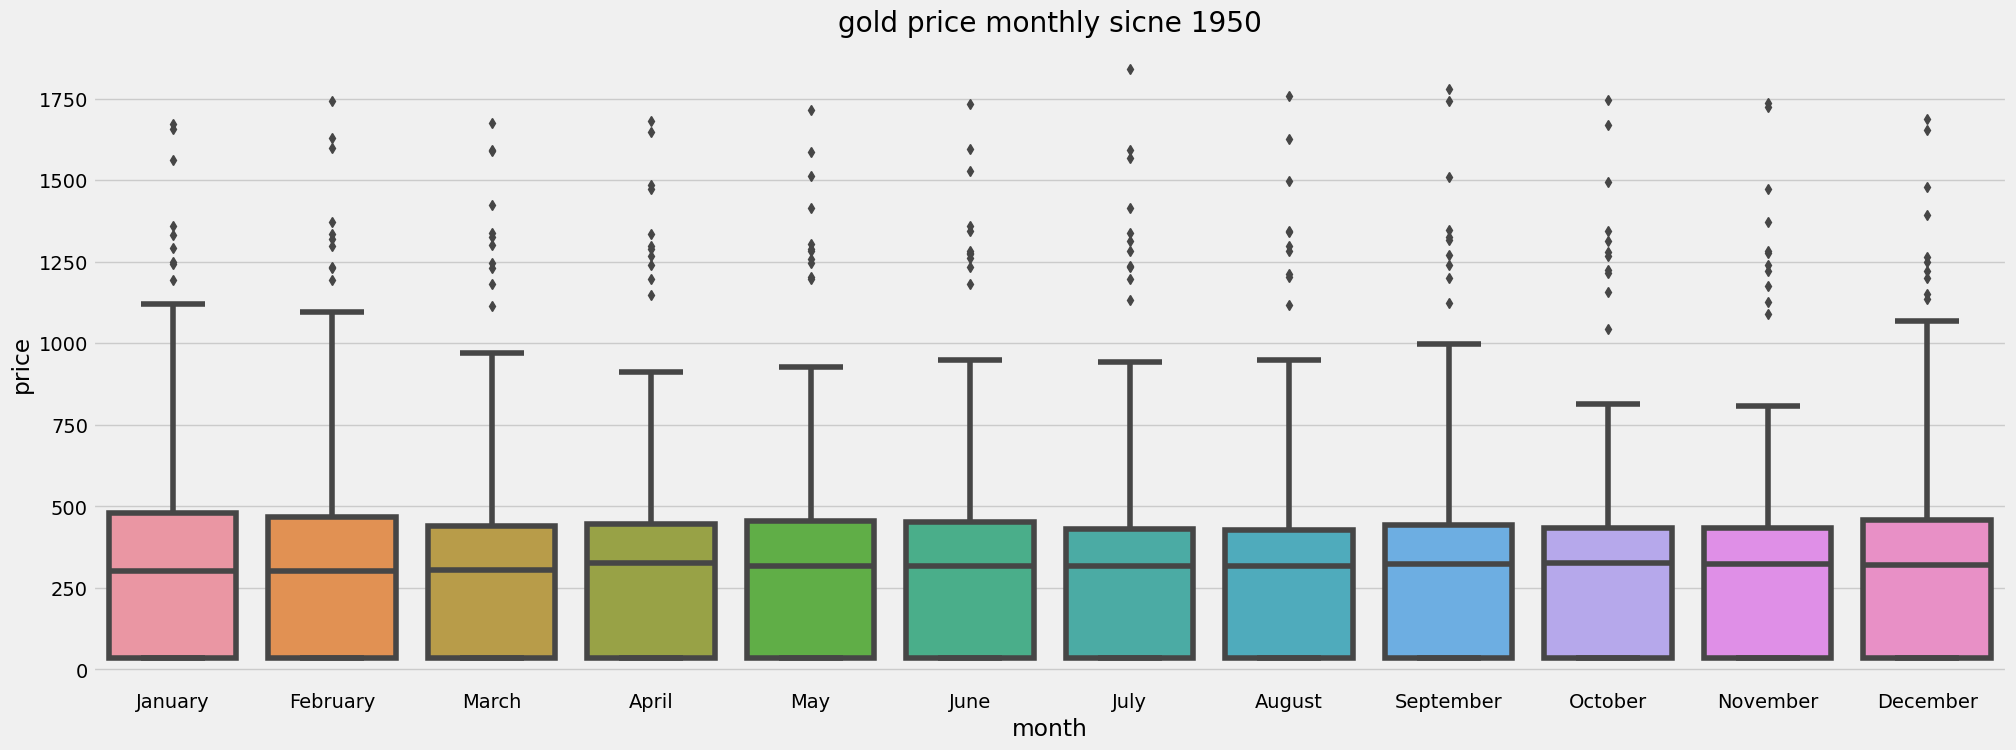

In [203]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax = ax)
plt.title ('gold price monthly sicne 1950')
plt.xlabel ("month")
plt.ylabel ("price")
plt.show();

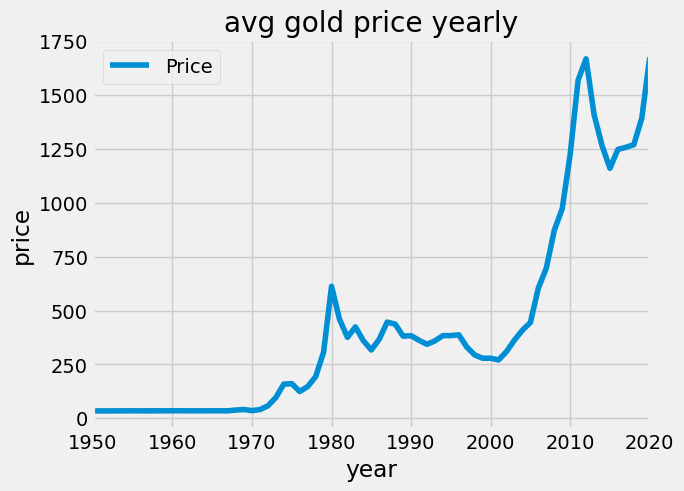

In [204]:
df_yearly_sum = df.resample('A').mean ()
df_yearly_sum.plot()
plt.title("avg gold price yearly")
plt.xlabel('year')
plt.ylabel('price')
plt.show();

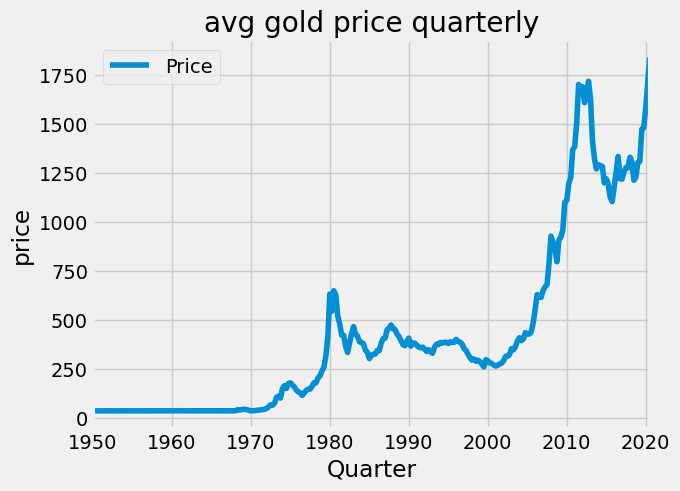

In [205]:
df_quarterly_sum = df.resample('Q').mean ()
df_quarterly_sum.plot()
plt.title('avg gold price quarterly')
plt.xlabel('Quarter')
plt.ylabel('price')
plt.show();

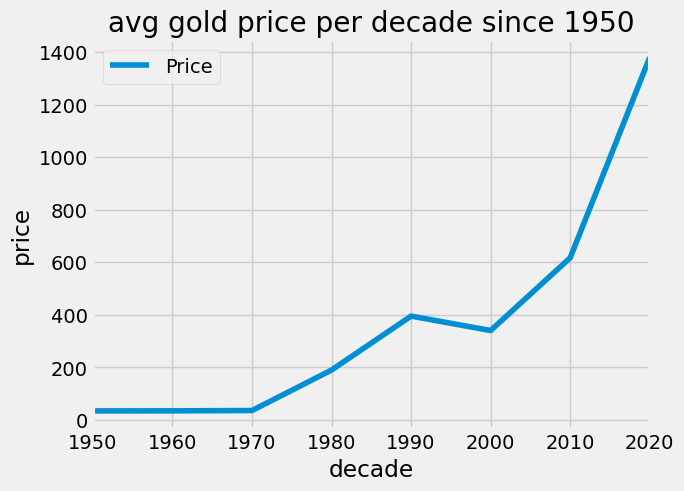

In [206]:
df_decade_sum = df.resample('10Y').mean ()
df_decade_sum.plot()
plt.title('avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.show();

In [222]:
# Calculate mean and rename
mean_df = df.groupby(df.index.year).mean().rename(columns={'price': 'Mean'})

# Calculate standard deviation and rename
std_df = df.groupby(df.index.year).std().rename(columns={'price': 'Std'})

# Merge mean and standard deviation DataFrames
df_1 = mean_df.merge(std_df, left_index=True, right_index=True)

# Calculate Coefficient of Variation if 'Std' exists
if 'Std' in df_1.columns:
    df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)
else:
    print("Column 'Std' not found. Cannot calculate CoV.")

# Display the first few rows of the resulting DataFrame
print(df_1.head())


Column 'Std' not found. Cannot calculate CoV.
         Price_x   Price_y
month                     
1950   34.729167  0.002887
1951   34.717500  0.020057
1952   34.628333  0.117538
1953   34.879167  0.056481
1954   35.020000  0.082792


In [240]:
Train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [242]:
print(Train.shape)
print(test.shape)

(792, 1)
(55, 1)


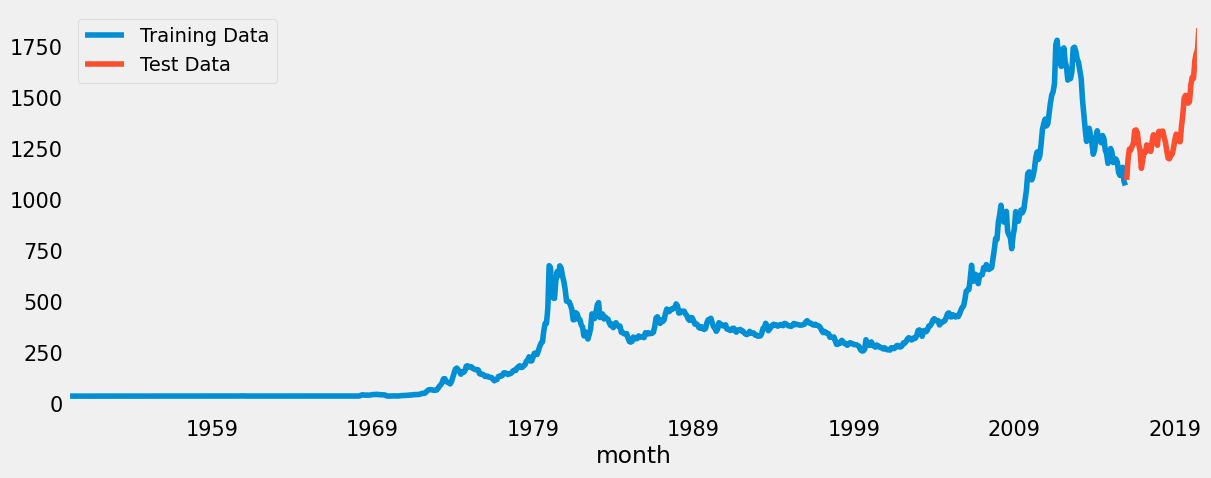

In [246]:
Train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show();

In [248]:
train_time = [i + 1 for i in range(len(Train))]
test_time = [i + len(Train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [252]:
LR_Train = Train.copy()
LR_test = test.copy()

In [254]:
LR_Train['time']= train_time
LR_test['time'] = test_time

In [258]:
lr = LinearRegression()
lr.fit(LR_Train[['time']],LR_Train["Price"].values)

LinearRegression()

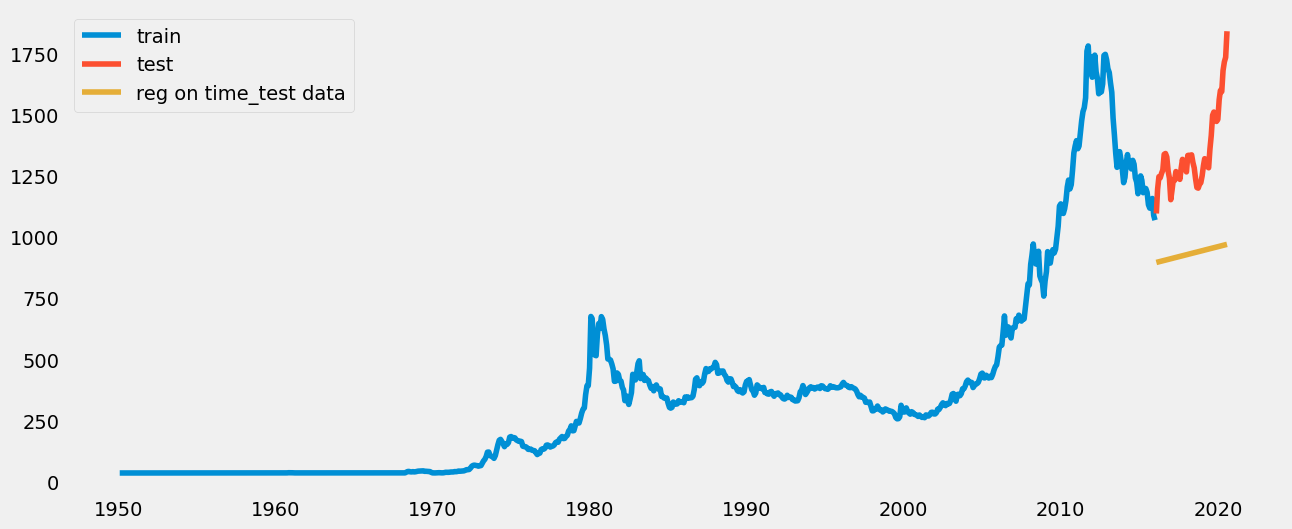

In [268]:
test_prediction_model1 = lr.predict(LR_test[['time']])
LR_test ["forecast"] = test_prediction_model1

plt.figure(figsize = (14,6))
plt.plot(Train['Price'], label = 'train')
plt.plot(test['Price'],label = 'test')
plt.plot(LR_test['forecast'], label = "reg on time_test data")
plt.legend(loc = 'best')
plt.grid()

In [282]:
def mape(actual, pred):return round((np.mean(abs(actual - pred)/ actual)) * 100, 2)

In [284]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%")

MAPE is 29.760 %


In [296]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index = ['RegressionOnTime'])
results

,Test Mape (%)
RegressionOnTime,29.76


In [310]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure your DataFrame 'df' is properly indexed with a DateTime index
# Assuming 'df' has a column 'price' that you want to model
final_model = ExponentialSmoothing(
    df['Price'],              # Ensure you are using the correct column
    trend='additive',        # Corrected spelling from 'addictive' to 'additive'
    seasonal='additive',     # Also corrected here
    seasonal_periods=12      # Specify the seasonal period (e.g., 12 for monthly data)
).fit(smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)


In [318]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [320]:
prediction = final_model.forecast(steps=len(test))

In [356]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std (final_model.resid,ddof=1),
                        'prediction':prediction,
                        'upper_CI': prediction + 1.96*np.std (final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


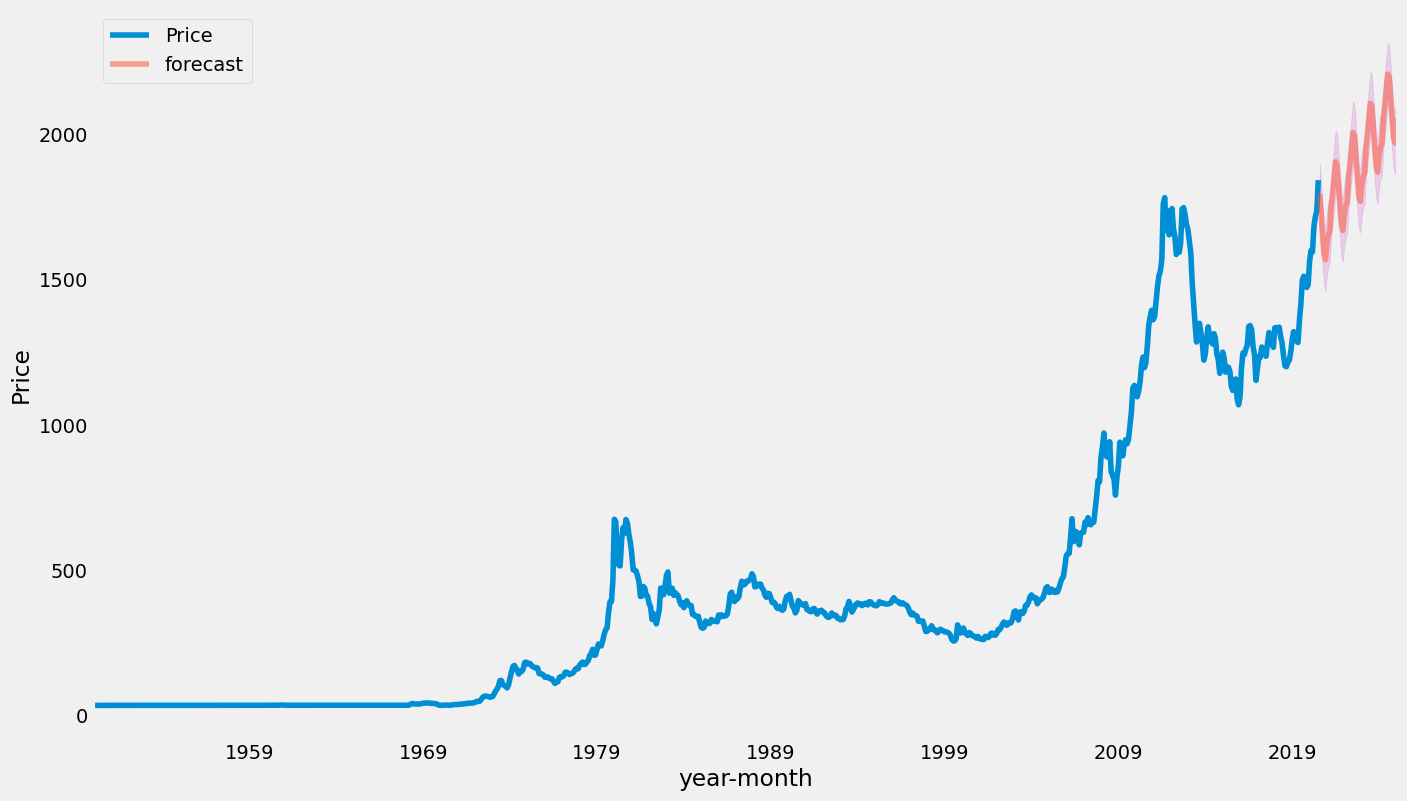

In [362]:
axis = df.plot(label = 'Actual', figsize=(15,9))
pred_df ['prediction'].plot(ax = axis, label = 'forecast', alpha =0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = "m", alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()